# Exploratory Data Analysis

## Introduction

After the data cleaning step where we put our data into a few standard formats, the next step is to take a look at the data and see if what we're looking at makes sense. Before applying any fancy algorithms, it's always important to explore the data first.

When working with numerical data, some of the exploratory data analysis (EDA) techniques we can use include finding the average of the data set, the distribution of the data, the most common values, etc. The idea is the same when working with text data. We are going to find some more obvious patterns with EDA before identifying the hidden patterns with machines learning (ML) techniques. We are going to look at the following for each comedian:

1. **Most common words** - find these and create word clouds
2. **Size of vocabulary** - look number of unique words and also how quickly someone speaks
3. **Amount of profanity** - most common terms

## Most Common Words

### Analysis

In [29]:
# Read in the document-term matrix
import pandas as pd

data = pd.read_pickle('C:/Users/Nandini/OneDrive/Desktop/NLP Assignments/pickle/dtm.pkl')
data = data.transpose()
data.head()

,ali,anthony,bill,bo,dave,hasan,jim,joe,john,louis,mike,ricky
aaaaah,0,0,1,0,0,0,0,0,0,0,0,0
aaaaahhhhhhh,0,0,0,1,0,0,0,0,0,0,0,0
aaaaauuugghhhhhh,0,0,0,1,0,0,0,0,0,0,0,0
aaaahhhhh,0,0,0,1,0,0,0,0,0,0,0,0
aaah,0,0,0,0,1,0,0,0,0,0,0,0


In [30]:
# Find the top 30 words said by each comedian
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

{'ali': [('like', 126),
  ('im', 74),
  ('know', 65),
  ('just', 64),
  ('dont', 61),
  ('shit', 34),
  ('thats', 34),
  ('youre', 31),
  ('gonna', 28),
  ('ok', 26),
  ('lot', 24),
  ('gotta', 21),
  ('oh', 21),
  ('wanna', 21),
  ('husband', 20),
  ('got', 19),
  ('time', 19),
  ('right', 19),
  ('cause', 18),
  ('women', 17),
  ('day', 17),
  ('people', 16),
  ('pregnant', 15),
  ('hes', 14),
  ('need', 14),
  ('god', 14),
  ('yeah', 13),
  ('tell', 13),
  ('theyre', 12),
  ('dude', 12)],
 'anthony': [('im', 60),
  ('like', 50),
  ('know', 39),
  ('dont', 38),
  ('got', 34),
  ('joke', 34),
  ('thats', 31),
  ('said', 31),
  ('anthony', 27),
  ('day', 26),
  ('say', 26),
  ('just', 26),
  ('guys', 23),
  ('people', 22),
  ('tell', 19),
  ('youre', 19),
  ('grandma', 18),
  ('right', 18),
  ('time', 17),
  ('think', 17),
  ('thing', 17),
  ('school', 16),
  ('jokes', 16),
  ('yeah', 16),
  ('did', 16),
  ('good', 16),
  ('okay', 15),
  ('gonna', 15),
  ('ive', 15),
  ('baby', 15)],
 

In [31]:
# Print the top 15 words said by each comedian
for comedian, top_words in top_dict.items():
    print(comedian)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---')

ali
like, im, know, just, dont, shit, thats, youre, gonna, ok, lot, gotta, oh, wanna
---
anthony
im, like, know, dont, got, joke, thats, said, anthony, day, say, just, guys, people
---
bill
like, just, right, im, know, dont, gonna, got, fucking, yeah, shit, youre, thats, dude
---
bo
know, like, think, love, im, bo, just, stuff, repeat, dont, yeah, want, right, cos
---
dave
like, know, said, just, im, shit, people, didnt, ahah, dont, time, fuck, thats, fucking
---
hasan
like, im, know, dont, dad, youre, just, going, thats, want, got, love, shes, hasan
---
jim
like, im, dont, right, fucking, just, went, know, youre, people, thats, day, oh, think
---
joe
like, people, just, dont, im, fucking, fuck, thats, gonna, theyre, know, youre, think, shit
---
john
like, know, just, dont, said, clinton, im, thats, right, youre, little, hey, got, time
---
louis
like, just, know, dont, thats, im, youre, life, people, thing, gonna, hes, cause, theres
---
mike
like, im, know, said, just, dont, think, tha

**NOTE:** At this point, we could go on and create word clouds. However, by looking at these top words, you can see that some of them have very little meaning and could be added to a stop words list, so let's do just that.



In [32]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 30 words for each comedian
words = []
for comedian in data.columns:
    top = [word for (word, count) in top_dict[comedian]]
    for t in top:
        words.append(t)
        
words

['like',
 'im',
 'know',
 'just',
 'dont',
 'shit',
 'thats',
 'youre',
 'gonna',
 'ok',
 'lot',
 'gotta',
 'oh',
 'wanna',
 'husband',
 'got',
 'time',
 'right',
 'cause',
 'women',
 'day',
 'people',
 'pregnant',
 'hes',
 'need',
 'god',
 'yeah',
 'tell',
 'theyre',
 'dude',
 'im',
 'like',
 'know',
 'dont',
 'got',
 'joke',
 'thats',
 'said',
 'anthony',
 'day',
 'say',
 'just',
 'guys',
 'people',
 'tell',
 'youre',
 'grandma',
 'right',
 'time',
 'think',
 'thing',
 'school',
 'jokes',
 'yeah',
 'did',
 'good',
 'okay',
 'gonna',
 'ive',
 'baby',
 'like',
 'just',
 'right',
 'im',
 'know',
 'dont',
 'gonna',
 'got',
 'fucking',
 'yeah',
 'shit',
 'youre',
 'thats',
 'dude',
 'think',
 'fuck',
 'want',
 'people',
 'did',
 'hes',
 'guy',
 'didnt',
 'make',
 'come',
 'thing',
 'going',
 'theyre',
 'let',
 'theres',
 'doing',
 'know',
 'like',
 'think',
 'love',
 'im',
 'bo',
 'just',
 'stuff',
 'repeat',
 'dont',
 'yeah',
 'want',
 'right',
 'cos',
 'eye',
 'said',
 'people',
 'fucki

In [33]:
# Let's aggregate this list and identify the most common words along with how many routines they occur in
Counter(words).most_common()

[('like', 12),
 ('im', 12),
 ('know', 12),
 ('just', 12),
 ('dont', 12),
 ('thats', 12),
 ('right', 12),
 ('people', 12),
 ('youre', 11),
 ('got', 10),
 ('time', 9),
 ('gonna', 8),
 ('think', 8),
 ('oh', 7),
 ('yeah', 7),
 ('said', 7),
 ('cause', 6),
 ('hes', 6),
 ('theyre', 6),
 ('say', 6),
 ('fucking', 6),
 ('shit', 5),
 ('day', 5),
 ('thing', 5),
 ('good', 5),
 ('fuck', 5),
 ('want', 5),
 ('going', 5),
 ('theres', 5),
 ('did', 4),
 ('didnt', 4),
 ('really', 4),
 ('dude', 3),
 ('guys', 3),
 ('ive', 3),
 ('little', 3),
 ('man', 3),
 ('life', 3),
 ('went', 3),
 ('ok', 2),
 ('lot', 2),
 ('gotta', 2),
 ('women', 2),
 ('tell', 2),
 ('joke', 2),
 ('school', 2),
 ('guy', 2),
 ('make', 2),
 ('come', 2),
 ('love', 2),
 ('dad', 2),
 ('mom', 2),
 ('hey', 2),
 ('white', 2),
 ('goes', 2),
 ('kids', 2),
 ('real', 2),
 ('old', 2),
 ('mean', 2),
 ('id', 2),
 ('wanna', 1),
 ('husband', 1),
 ('pregnant', 1),
 ('need', 1),
 ('god', 1),
 ('anthony', 1),
 ('grandma', 1),
 ('jokes', 1),
 ('okay', 1),
 ('b

In [34]:
# If more than half of the comedians have it as a top word, exclude it from the list
add_stop_words = [word for word, count in Counter(words).most_common() if count > 6]
add_stop_words

['like',
 'im',
 'know',
 'just',
 'dont',
 'thats',
 'right',
 'people',
 'youre',
 'got',
 'time',
 'gonna',
 'think',
 'oh',
 'yeah',
 'said']

In [35]:
pip install wordcloud


You should consider upgrading via the 'c:\Python310\python.exe -m pip install --upgrade pip' command.


In [36]:
# Let's update our document-term matrix with the new list of stop words
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

# Read in cleaned data
data_clean = pd.read_pickle('C:/Users/Nandini/OneDrive/Desktop/NLP Assignments/pickle/data_clean.pkl')

# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.transcript)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names_out())
data_stop.index = data_clean.index

# Pickle it for later use
import pickle
pickle.dump(cv, open("cv_stop.pkl", "wb"))
data_stop.to_pickle("dtm_stop.pkl")
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

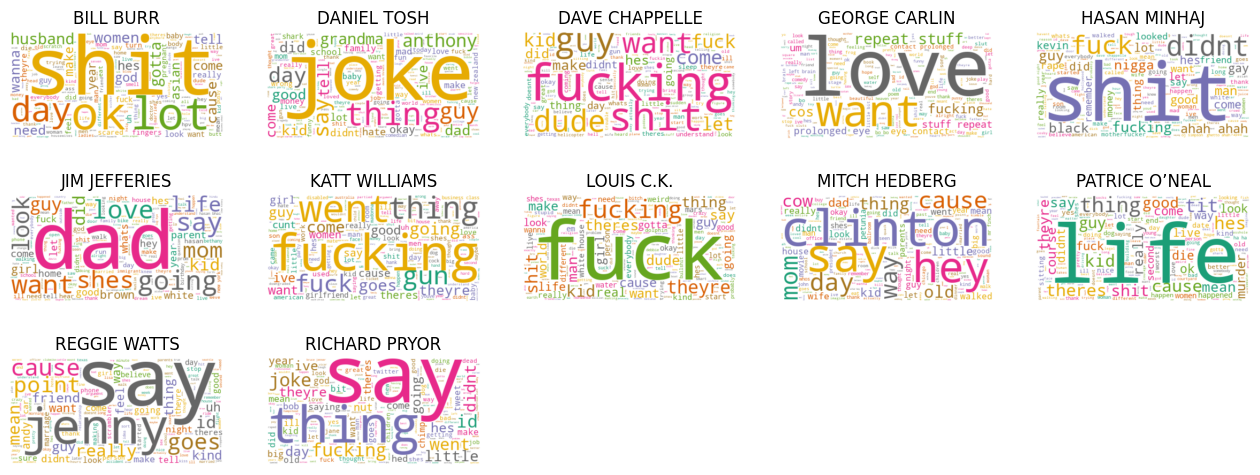

In [37]:
# Reset the output dimensions
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 6]

full_names = ['BILL BURR', 'DANIEL TOSH', 'DAVE CHAPPELLE', 'GEORGE CARLIN', 'HASAN MINHAJ',
              'JIM JEFFERIES', 'KATT WILLIAMS', 'LOUIS C.K.', 'MITCH HEDBERG', 'PATRICE O’NEAL', 'REGGIE WATTS','RICHARD PRYOR','SETH MEYERS','TOM SEGURA','TREVOR NOAH']

# Create subplots for each comedian
for index, comedian in enumerate(data.columns):
    wc.generate(data_clean.transcript[comedian])
    
    plt.subplot(3, 5, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(full_names[index])
    
plt.show()

### Findings

* Ali Wong says the s-word a lot and talks about her husband. I guess that's funny to me.
* A lot of people use the F-word. Let's dig into that later.

## Number of Words

### Analysis

In [38]:
# Find the number of unique words that each comedian uses

# Identify the non-zero items in the document-term matrix, meaning that the word occurs at least once
unique_list = []
for comedian in data.columns:
    uniques = data[comedian].to_numpy().nonzero()[0].size
    unique_list.append(uniques)

# Create a new dataframe that contains this unique word count
data_words = pd.DataFrame(list(zip(full_names, unique_list)), columns=['comedian', 'unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words')
data_unique_sort

,comedian,unique_words
1,DANIEL TOSH,984
9,PATRICE O’NEAL,1098
3,GEORGE CARLIN,1272
6,KATT WILLIAMS,1313
0,BILL BURR,1341
8,MITCH HEDBERG,1391
4,HASAN MINHAJ,1404
7,LOUIS C.K.,1435
10,REGGIE WATTS,1494
5,JIM JEFFERIES,1559


In [39]:
# Calculate the words per minute of each comedian

# Find the total number of words that a comedian uses
total_list = []
for comedian in data.columns:
    totals = sum(data[comedian])
    total_list.append(totals)
    
# Comedy special run times from IMDB, in minutes
run_times = [60, 59, 80, 60, 67, 73, 77, 63, 62, 58, 76, 79]

# Let's add some columns to our dataframe
data_words['total_words'] = total_list
data_words['run_times'] = run_times
data_words['words_per_minute'] = data_words['total_words'] / data_words['run_times']

# Sort the dataframe by words per minute to see who talks the slowest and fastest
data_wpm_sort = data_words.sort_values(by='words_per_minute')
data_wpm_sort

,comedian,unique_words,total_words,run_times,words_per_minute
1,DANIEL TOSH,984,2905,59,49.237288
3,GEORGE CARLIN,1272,3165,60,52.750000
0,BILL BURR,1341,3283,60,54.716667
9,PATRICE O’NEAL,1098,3332,58,57.448276
4,HASAN MINHAJ,1404,4094,67,61.104478
6,KATT WILLIAMS,1313,4764,77,61.870130
10,REGGIE WATTS,1494,4741,76,62.381579
11,RICHARD PRYOR,1633,4972,79,62.936709
8,MITCH HEDBERG,1391,4001,62,64.532258
5,JIM JEFFERIES,1559,4777,73,65.438356


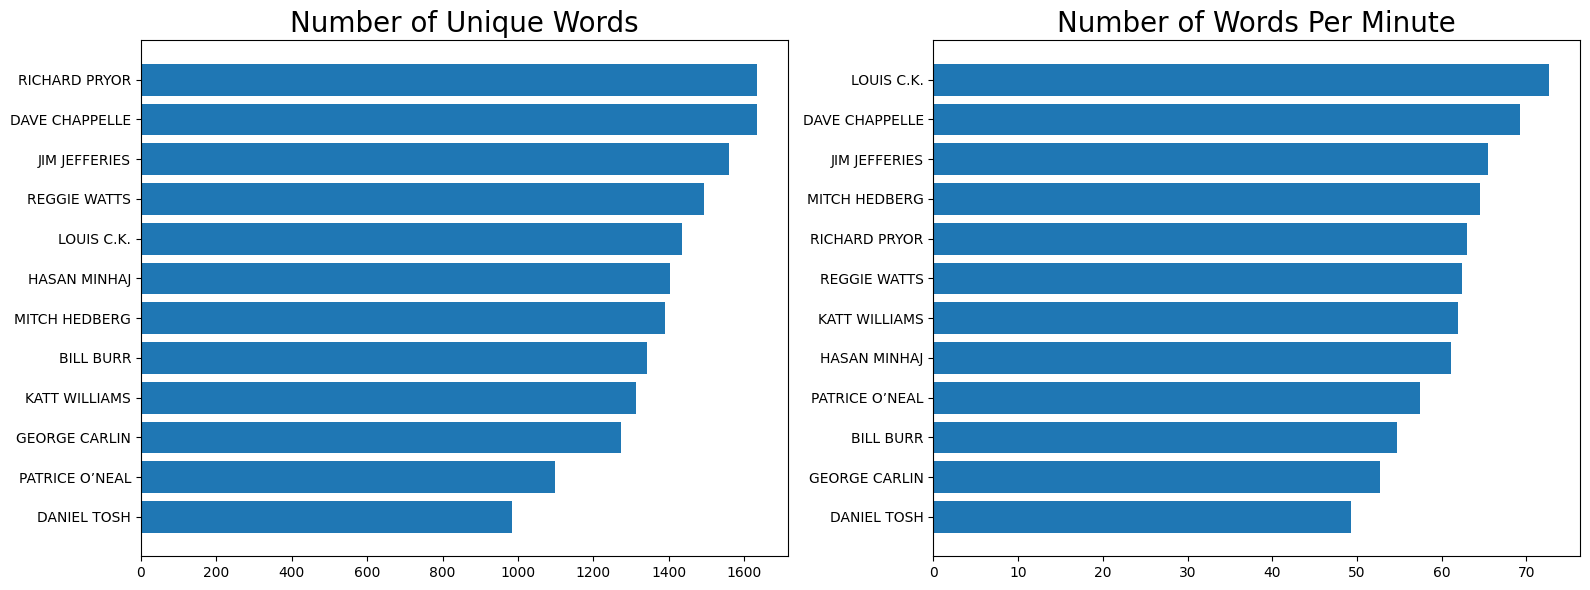

In [40]:
# Let's plot our findings
import numpy as np

y_pos = np.arange(len(data_words))

plt.subplot(1, 2, 1)
plt.barh(y_pos, data_unique_sort.unique_words, align='center')
plt.yticks(y_pos, data_unique_sort.comedian)
plt.title('Number of Unique Words', fontsize=20)

plt.subplot(1, 2, 2)
plt.barh(y_pos, data_wpm_sort.words_per_minute, align='center')
plt.yticks(y_pos, data_wpm_sort.comedian)
plt.title('Number of Words Per Minute', fontsize=20)

plt.tight_layout()
plt.show()

### Findings

* **Vocabulary**
   * Richard and Dave use a lot of unique words in their comedy
   * Patrice and daniel Carlin have a smaller vocabulary


* **Talking Speed**
   * Louis talks fast
   * Daniel talks slow
   


## Amount of Profanity

### Analysis

In [41]:
# Earlier I said we'd revisit profanity. Let's take a look at the most common words again.
Counter(words).most_common()

[('like', 12),
 ('im', 12),
 ('know', 12),
 ('just', 12),
 ('dont', 12),
 ('thats', 12),
 ('right', 12),
 ('people', 12),
 ('youre', 11),
 ('got', 10),
 ('time', 9),
 ('gonna', 8),
 ('think', 8),
 ('oh', 7),
 ('yeah', 7),
 ('said', 7),
 ('cause', 6),
 ('hes', 6),
 ('theyre', 6),
 ('say', 6),
 ('fucking', 6),
 ('shit', 5),
 ('day', 5),
 ('thing', 5),
 ('good', 5),
 ('fuck', 5),
 ('want', 5),
 ('going', 5),
 ('theres', 5),
 ('did', 4),
 ('didnt', 4),
 ('really', 4),
 ('dude', 3),
 ('guys', 3),
 ('ive', 3),
 ('little', 3),
 ('man', 3),
 ('life', 3),
 ('went', 3),
 ('ok', 2),
 ('lot', 2),
 ('gotta', 2),
 ('women', 2),
 ('tell', 2),
 ('joke', 2),
 ('school', 2),
 ('guy', 2),
 ('make', 2),
 ('come', 2),
 ('love', 2),
 ('dad', 2),
 ('mom', 2),
 ('hey', 2),
 ('white', 2),
 ('goes', 2),
 ('kids', 2),
 ('real', 2),
 ('old', 2),
 ('mean', 2),
 ('id', 2),
 ('wanna', 1),
 ('husband', 1),
 ('pregnant', 1),
 ('need', 1),
 ('god', 1),
 ('anthony', 1),
 ('grandma', 1),
 ('jokes', 1),
 ('okay', 1),
 ('b

In [42]:
# Let's isolate just these bad words
data_bad_words = data.transpose()[['fucking', 'fuck', 'shit']]
data_profanity = pd.concat([data_bad_words.fucking + data_bad_words.fuck, data_bad_words.shit], axis=1)
data_profanity.columns = ['f_word', 's_word']
data_profanity

,f_word,s_word
ali,16,34
anthony,15,9
bill,106,63
bo,37,6
dave,65,45
hasan,24,15
jim,115,20
joe,135,40
john,4,6
louis,21,25


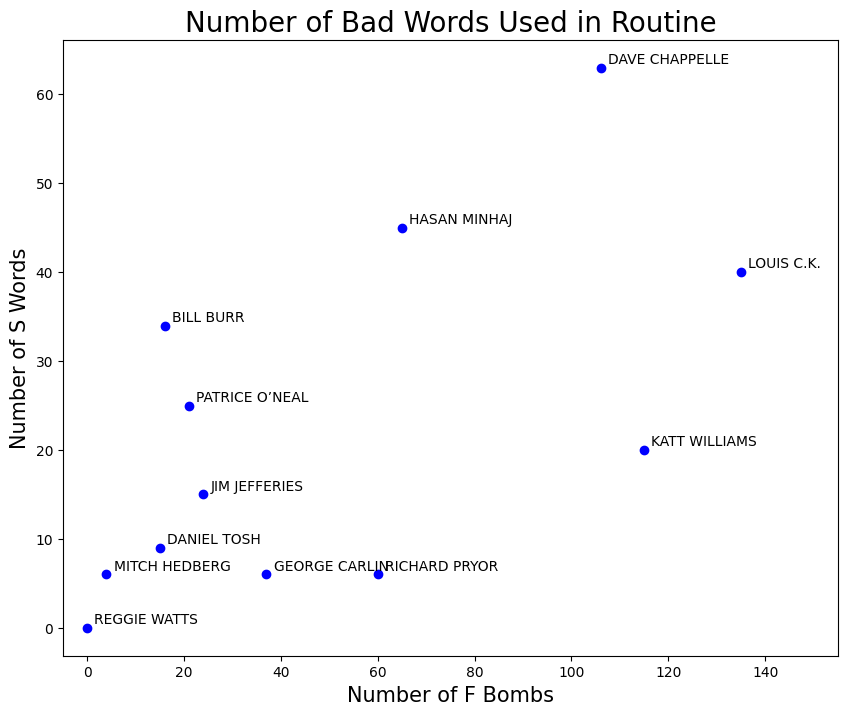

In [43]:
# Let's create a scatter plot of our findings
plt.rcParams['figure.figsize'] = [10, 8]

for i, comedian in enumerate(data_profanity.index):
    x = data_profanity.f_word.loc[comedian]
    y = data_profanity.s_word.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+1.5, y+0.5, full_names[i], fontsize=10)
    plt.xlim(-5, 155) 
    
plt.title('Number of Bad Words Used in Routine', fontsize=20)
plt.xlabel('Number of F Bombs', fontsize=15)
plt.ylabel('Number of S Words', fontsize=15)

plt.show()

### Findings

Dave is the one with most number of bad words

## Side Note

What was our goal for the EDA portion of our journey? **To be able to take an initial look at our data and see if the results of some basic analysis made sense.**

My conclusion - yes, it does, for a first pass. There are definitely some things that could be better cleaned up, such as adding more stop words or including bi-grams. But we can save that for another day. The results, especially the profanity findings, are interesting and make general sense, so we're going to move on.

As a reminder, the data science process is an interative one. It's better to see some non-perfect but acceptable results to help you quickly decide whether your project is a dud or not, instead of having analysis paralysis and never delivering anything.

**Alice's data science (and life) motto: Let go of perfectionism!**

## Additional Exercises

1. What other word counts do you think would be interesting to compare instead of the f-word and s-word? Create a scatter plot comparing them.

In [44]:
# a scatter plot comparing the count of positive and negative words for each comedian.
import nltk
from nltk.corpus import opinion_lexicon
nltk.download('opinion_lexicon')

positive_words = set(opinion_lexicon.positive())
negative_words = set(opinion_lexicon.negative())


[nltk_data] Downloading package opinion_lexicon to
[nltk_data]     C:\Users\Nandini\AppData\Roaming\nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!


ali
Positive Word Count:  302
Negative Word Count:  255
anthony
Positive Word Count:  243
Negative Word Count:  316
bill
Positive Word Count:  545
Negative Word Count:  481
bo
Positive Word Count:  304
Negative Word Count:  284
dave
Positive Word Count:  310
Negative Word Count:  355
hasan
Positive Word Count:  469
Negative Word Count:  218
jim
Positive Word Count:  451
Negative Word Count:  388
joe
Positive Word Count:  373
Negative Word Count:  500
john
Positive Word Count:  421
Negative Word Count:  200
louis
Positive Word Count:  317
Negative Word Count:  261
mike
Positive Word Count:  525
Negative Word Count:  248
ricky
Positive Word Count:  450
Negative Word Count:  479


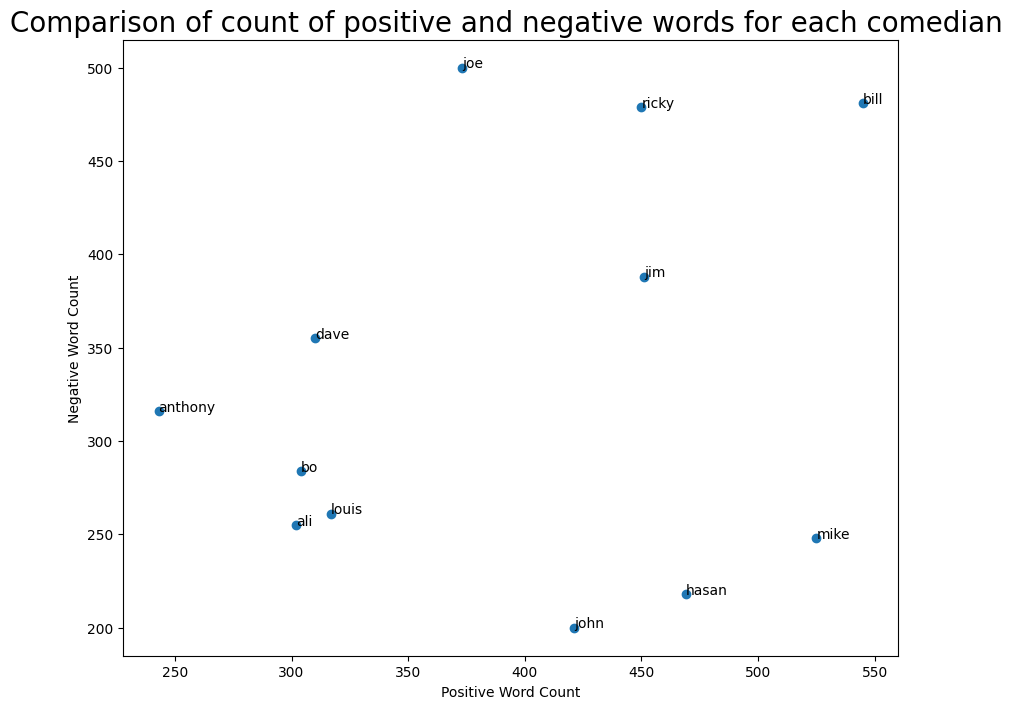

In [45]:
import matplotlib.pyplot as plt

positive_word_counts = []
negative_word_counts = []

for comedian in data_clean.index:
    transcript = data_clean.loc[comedian, 'transcript']
    positive_count = 0
    negative_count = 0
    
    words = transcript.split()
    
    for word in words:
        if word in positive_words:
            positive_count += 1
        elif word in negative_words:
            negative_count += 1
    
    positive_word_counts.append(positive_count)
    negative_word_counts.append(negative_count)

fig, ax = plt.subplots()
ax.scatter(positive_word_counts, negative_word_counts)
plt.xlabel('Positive Word Count')
plt.ylabel('Negative Word Count')
plt.title('Comparison of count of positive and negative words for each comedian ', fontsize=20)
for i, comedian in enumerate(data_clean.index):
    ax.annotate(comedian, (positive_word_counts[i], negative_word_counts[i]))
    print(comedian)
    print('Positive Word Count: ',positive_word_counts[i])
    print('Negative Word Count: ',negative_word_counts[i])

plt.show()



#stackoverflow and chatGPT

In [46]:
data_clean.columns

Index(['transcript'], dtype='object')

## Findings

bill and mike had the most amount of positive words in their sets while joey and ricky and bill had the most amount of negative words.
This gives an idea of the tone of the comedy performance.

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Nandini\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Nandini\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


ali
Religious Word Count:  16
anthony
Religious Word Count:  8
bill
Religious Word Count:  49
bo
Religious Word Count:  18
dave
Religious Word Count:  8
hasan
Religious Word Count:  15
jim
Religious Word Count:  4
joe
Religious Word Count:  27
john
Religious Word Count:  5
louis
Religious Word Count:  8
mike
Religious Word Count:  4
ricky
Religious Word Count:  23


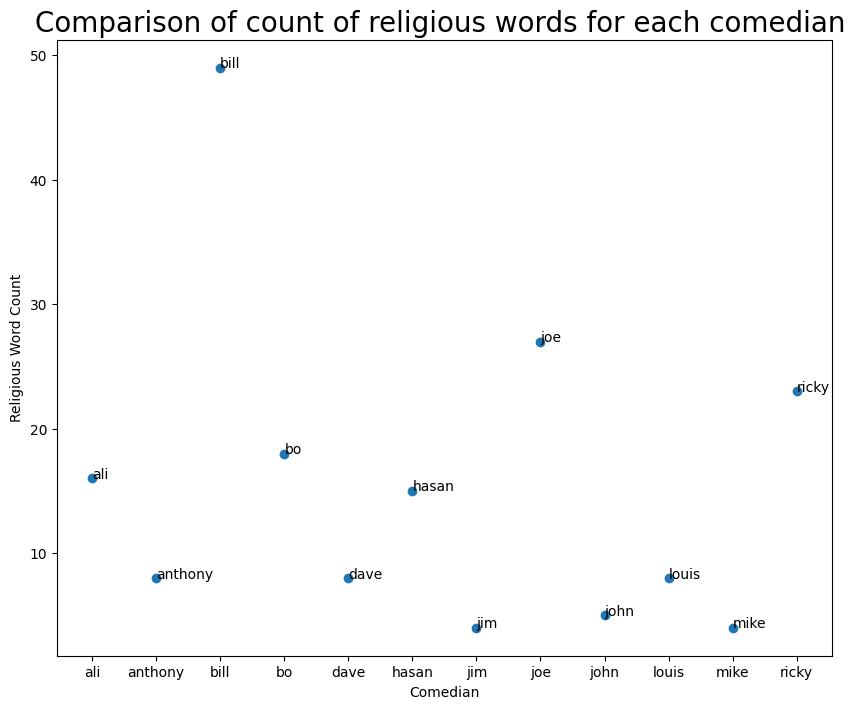

In [47]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')

stop_words = set(stopwords.words("english"))
religious_words = ['god', 'lord', 'jesus', 'christ', 'bible', 'faith', 'religion', 'pray', 'prayer']

religious_word_counts = []

for comedian in data_clean.index:
    transcript = data_clean.loc[comedian, 'transcript']
    
    words = word_tokenize(transcript)
    
    religious_count = 0
    for word in words:
        if word.lower() in religious_words:
            religious_count += 1
    
    religious_word_counts.append(religious_count)

fig, ax = plt.subplots()
ax.scatter(data_clean.index, religious_word_counts)
plt.xlabel('Comedian')
plt.ylabel('Religious Word Count')
plt.title('Comparison of count of religious words for each comedian ', fontsize=20)
for i, comedian in enumerate(data_clean.index):
    ax.annotate(comedian, (i, religious_word_counts[i]))
    print(comedian)
    print('Religious Word Count: ',religious_word_counts[i])

plt.show()


This can give insights into the religious themes or references used by each comedian in their comedy. However, it is important to note that the results may not accurately reflect the comedians' personal beliefs or religion. These words may be used as mere slangs.


2. Can min_df and max_df be used to count the top 30 words for each comedian?

In [48]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english', min_df=5, max_df=0.5)
dtm = vectorizer.fit_transform(data['transcript'])
words = vectorizer.get_feature_names()
top_30_words = []
for i in range(data.shape[0]):
    row = dtm[i, :].toarray().ravel()
    row_words = [(words[j], row[j]) for j in row.argsort()[:-31:-1]]
    top_30_words.append(row_words)
    print('Comedian:', data.index[i])
    print('Top 30 words:', row_words)
    

    
#Reference: stackoverflow

KeyError: 'transcript'